<a href="https://colab.research.google.com/github/vard-uhi/new-task/blob/main/Model_Comparison_promotional__email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook provides an example code of churn prediction of the Promotional Email Campaign  using Logistic Regression. The dependent variable is Target (shows whether the customer responded the promotional offer (1) or not (0).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['train.csv']))

In [4]:
df_train = raw_data.copy()

In [5]:
df_train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,ID,target
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,98.2,0,146.7,85,99,96,408,2,GA,0,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,181.3,0,180.6,108,135,103,415,0,OH,1,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,143.9,0,109.6,105,61,94,510,1,DC,2,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,259.9,0,134.4,122,68,121,510,3,VA,3,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,136.8,1,71.1,105,113,95,510,2,CA,4,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_0   3000 non-null   int64  
 1   variable_1   3000 non-null   float64
 2   variable_2   3000 non-null   float64
 3   variable_3   3000 non-null   int64  
 4   variable_4   3000 non-null   int64  
 5   variable_5   3000 non-null   float64
 6   variable_6   3000 non-null   float64
 7   variable_7   3000 non-null   float64
 8   variable_8   3000 non-null   int64  
 9   variable_9   3000 non-null   float64
 10  variable_10  3000 non-null   float64
 11  variable_11  3000 non-null   int64  
 12  variable_12  3000 non-null   float64
 13  variable_13  3000 non-null   int64  
 14  variable_14  3000 non-null   int64  
 15  variable_15  3000 non-null   int64  
 16  variable_16  3000 non-null   int64  
 17  variable_17  3000 non-null   int64  
 18  State        3000 non-null   object 
 19  ID    

In [7]:
#load the data
from google.colab import files
data_to_load2 = files.upload()

Saving test.csv to test.csv


In [8]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data2 = pd.read_csv(io.BytesIO(data_to_load2['test.csv']))

In [9]:
df_test = raw_data2.copy()

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_0   333 non-null    int64  
 1   variable_1   333 non-null    float64
 2   variable_2   333 non-null    float64
 3   variable_3   333 non-null    int64  
 4   variable_4   333 non-null    int64  
 5   variable_5   333 non-null    float64
 6   variable_6   333 non-null    float64
 7   variable_7   333 non-null    float64
 8   variable_8   333 non-null    int64  
 9   variable_9   333 non-null    float64
 10  variable_10  333 non-null    float64
 11  variable_11  333 non-null    int64  
 12  variable_12  333 non-null    float64
 13  variable_13  333 non-null    int64  
 14  variable_14  333 non-null    int64  
 15  variable_15  333 non-null    int64  
 16  variable_16  333 non-null    int64  
 17  variable_17  333 non-null    int64  
 18  State        333 non-null    object 
 19  ID      

Exploratory Data Analysis

In [11]:
#to see how many unique values we have under State
df_train['State'].unique()

array(['GA', 'OH', 'DC', 'VA', 'CA', 'MT', 'ND', 'IN', 'MI', 'SC', 'MD',
       'NV', 'ID', 'AZ', 'WY', 'MA', 'SD', 'TX', 'AL', 'CO', 'FL', 'IL',
       'NE', 'KY', 'DE', 'MN', 'IA', 'OR', 'OK', 'AK', 'UT', 'MS', 'PA',
       'WI', 'NY', 'NM', 'HI', 'KS', 'LA', 'NJ', 'RI', 'NH', 'CT', 'NC',
       'WA', 'MO', 'WV', 'ME', 'AR', 'VT', 'TN'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


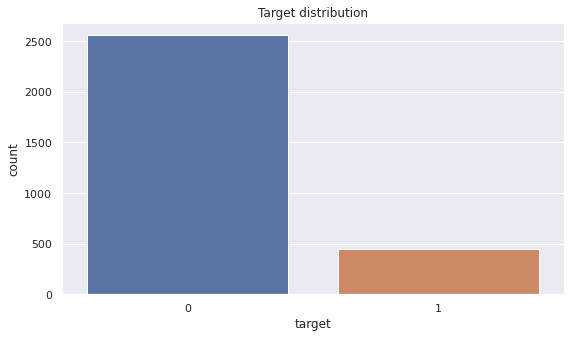

In [12]:
#let's visualise the distribution of churn
plt.figure(figsize=(9,5))
sns.countplot(df_train.target)
plt.title("Target distribution")
plt.show()

Our Target Data is unbalanced.

In [13]:
#lets count the benchmark for churn
df_train.target.value_counts(normalize=True).mul(100).rename("Target percentage")

0    85.166667
1    14.833333
Name: Target percentage, dtype: float64

Data Preprocessing Training data

In [ ]:
df_train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,ID,target
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,98.2,0,146.7,85,99,96,408,2,GA,0,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,181.3,0,180.6,108,135,103,415,0,OH,1,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,143.9,0,109.6,105,61,94,510,1,DC,2,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,259.9,0,134.4,122,68,121,510,3,VA,3,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,136.8,1,71.1,105,113,95,510,2,CA,4,0


In [14]:
# Removing ID
df_train = df_train.drop(columns='ID')

In [15]:
#drop state
df_train = df_train.drop(columns='State')

Correlation Matrix

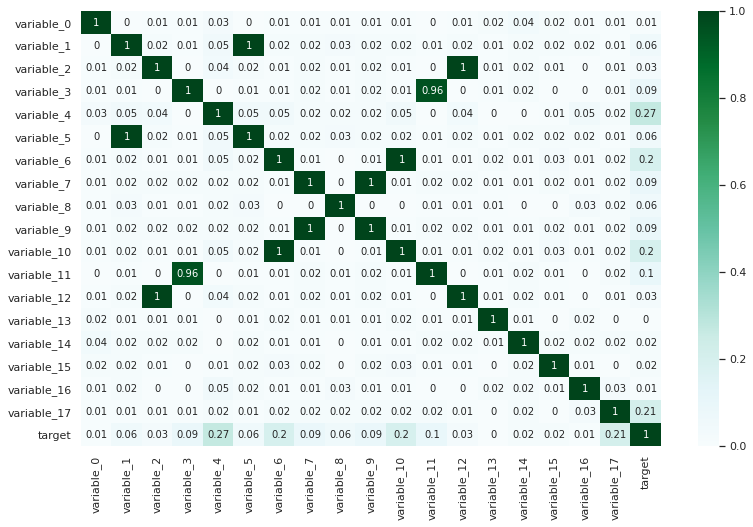

In [16]:
#Let's visualize correlations
plt.figure(figsize=(13,8))
sns.heatmap(df_train.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

We see several strongly correlated Variables. This time we will remove them to see improvement in predictions.

In [19]:
#removing correlated variables
df_train = df_train.drop(columns = ['variable_5', 'variable_9', 'variable_10', 'variable_11', 'variable_12'])

In [21]:
# How many columns do we now have?
len(df_train.columns)

14

Preparing Test Data

In [22]:
# Removing ID and State
df_test = df_test.drop(columns=['ID', 'State'])

In [23]:
#removing also correlated variables
df_test = df_test.drop(columns=['variable_5', 'variable_9', 'variable_10', 'variable_11', 'variable_12'])

In [24]:
df_test.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_6,variable_7,variable_8,variable_13,variable_14,variable_15,variable_16,variable_17
0,54,2.62,5.21,0,0,27.17,264.0,7,64,99,70,408,2
1,116,3.35,5.86,0,0,23.36,120.0,2,94,126,64,510,3
2,92,3.32,10.78,0,0,31.40,262.0,6,73,60,120,415,2
3,66,3.24,5.95,32,0,31.93,129.8,3,90,117,113,408,2
4,136,2.65,10.08,0,0,34.77,208.8,2,95,63,119,510,0


In [25]:
len(df_test.columns)

13

Setting up our Dependent and Independent variables.

In [26]:
# independent variables
unscaled_Inputs = df_train.drop(['target'],axis=1)

# dependent variable
target = df_train['target']

Undersampling.

As our target variable is unbalanced we will perform Undersampling to balance it.  

In [28]:
from imblearn.under_sampling import NearMiss

In [29]:
#implementing Undersampling to handle imbalanced
nm = NearMiss(random_state=42)

In [30]:
X_res, Y_res = nm.fit_sample(unscaled_Inputs, target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
X_res.shape

(890, 13)

In [32]:
Y_res.shape

(890,)

Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

campaign_scaler = StandardScaler()
campaign_scaler.fit(X_res)
scaled_inputes = campaign_scaler.transform(X_res)
scaled_inputes

array([[ 0.66855862,  0.19608491, -0.24226021, ...,  0.71314   ,
        -0.36086576, -0.54449631],
       [ 1.20844717,  0.88310398, -0.28738611, ...,  1.06079087,
        -0.36086576,  0.07599244],
       [-0.86112561, -1.31790157, -0.73864518, ..., -0.61952166,
        -0.36086576,  0.69648119],
       ...,
       [-0.32123706, -1.66141111,  1.73876711, ...,  0.94490725,
        -0.36086576,  0.69648119],
       [ 3.63794564, -1.86497231,  0.20448627, ...,  0.07578008,
         2.31579006, -0.54449631],
       [ 0.12867007,  0.84493625,  0.78661047, ...,  1.29255812,
        -0.36086576,  0.69648119]])

**Logistic Regression Model**

In [34]:
model = LogisticRegression()
model.fit(scaled_inputes, Y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Finding the intercept and coefficients

In [35]:
#let's see the order of classes
model.classes_

array([0, 1])

In [36]:
model.intercept_

array([0.0887682])

In [37]:
model.coef_

array([[ 0.08556038,  0.08566433,  0.12455421,  0.37220421,  0.80904054,
         0.7033998 ,  0.30795614, -0.15800097, -0.05391796, -0.03899963,
        -0.0357975 ,  0.60611546,  0.79971044]])

In [38]:
predictions = model.predict(scaled_inputes)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, Y_res)))
print(confusion_matrix(Y_res, predictions))
print(classification_report(Y_res, predictions))

Accuracy 75.17%
[[342 103]
 [118 327]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       445
           1       0.76      0.73      0.75       445

    accuracy                           0.75       890
   macro avg       0.75      0.75      0.75       890
weighted avg       0.75      0.75      0.75       890



Compared with result from imbalanced data we have lower accuracy score, however now precision for 0 and 1 are balanced. We get better result.

**Decision Tree Model**

In [44]:
# Let's try Decision Tree now to see if our resutls get better
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_dt = DecisionTreeClassifier()
model_dt.fit(scaled_inputes, Y_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
predictions_dt = model_dt.predict(scaled_inputes)
score_dt = model_dt.score(scaled_inputes, Y_res)

In [47]:
print("Accuracy = " + str(score_dt))
print(confusion_matrix(Y_res, predictions_dt))
print(classification_report(Y_res, predictions_dt))

Accuracy = 1.0
[[445   0]
 [  0 445]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       445

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



**Random Forest Model**

In [39]:
# Let's try Random Forests now to see if our resutls get better
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_rf = RandomForestClassifier()
model_rf.fit(scaled_inputes, Y_res)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
predictions = model_rf.predict(scaled_inputes)
score = model_rf.score(scaled_inputes, Y_res)

In [42]:
print("Accuracy = " + str(score))
print(confusion_matrix(Y_res, predictions))
print(classification_report(Y_res, predictions))


Accuracy = 1.0
[[445   0]
 [  0 445]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       445

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890



With training data we perform 3 Models and as we see "Random Forest" and "Decision Tree" ideally perform and have better than Logistic Regression. Now we will try on test data.

### **Test data**

In [85]:
#getting target variable for test data
test_target = df_train['target'].sample(n=333)

In [86]:
test_target.shape

(333,)

In [87]:
test_target.value_counts()

0    284
1     49
Name: target, dtype: int64

In [88]:
#resampling for balancing
X_test_res, Y_test_res = nm.fit_sample(df_test, test_target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [89]:
X_test_res.shape

(98, 13)

In [90]:
Y_test_res.shape

(98,)

Standartize

In [94]:
from sklearn.preprocessing import StandardScaler

test_scaler = StandardScaler()
test_scaler.fit(X_test_res)
test_scaled_inputes = test_scaler.transform(X_test_res)
test_scaled_inputes

array([[ 4.74248192e-01, -1.87798678e-01, -8.46045206e-01, ...,
        -4.42603098e-01, -4.75640289e-01,  2.75616385e-01],
       [ 1.87357311e-01,  5.38994166e-01, -1.56804406e-01, ...,
         1.07048191e+00, -4.75640289e-01,  1.96376674e+00],
       [-5.77685041e-01, -9.40189558e-02,  1.09215543e+00, ...,
         1.87848989e-01, -4.75640289e-01,  1.11969156e+00],
       ...,
       [-7.68945629e-01, -6.91864682e-01,  1.65187447e+00, ...,
        -4.42603098e-01,  1.85377112e+00, -5.68458794e-01],
       [ 1.74931878e+00,  1.58229357e+00, -1.42889313e+00, ...,
         1.76397921e+00, -4.75640289e-01, -5.68458794e-01],
       [-3.57800420e-02,  2.57655001e-01,  1.39283095e+00, ...,
        -1.28663691e-03, -4.75640289e-01, -1.41253397e+00]])

In [96]:
test_scaled_inputes.shape

(98, 13)

In [97]:
Y_test_res.shape

(98,)

In [98]:
#test prediction on Logistic Regression
test_predictions_lg = model.predict(test_scaled_inputes)
test_score_lg = model.score(test_scaled_inputes, Y_test_res)

In [99]:
#test prediction on Decision Tree
test_predictions_dt = model_dt.predict(test_scaled_inputes)
test_score_dt = model_dt.score(test_scaled_inputes, Y_test_res)

In [100]:
#test prediction on Random Forest
test_predictions_rf = model_rf.predict(test_scaled_inputes)
test_score_rf = model_rf.score(test_scaled_inputes, Y_test_res)

In [101]:
print("Logistic Regression")
print("Accuracy = " + str(test_score_lg))
print(confusion_matrix(Y_test_res, test_predictions_lg))
print(classification_report(Y_test_res, test_predictions_lg))
print("--------------------------------")

print("Decision Tree")
print("Accuracy = " + str(test_score_dt))
print(confusion_matrix(Y_test_res, test_predictions_dt))
print(classification_report(Y_test_res, test_predictions_dt))
print("--------------------------------")

print("Random Forest")
print("Accuracy = " + str(test_score_rf))
print(confusion_matrix(Y_test_res, test_predictions_rf))
print(classification_report(Y_test_res, test_predictions_rf))

Logistic Regression
Accuracy = 0.6326530612244898
[[31 18]
 [18 31]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        49
           1       0.63      0.63      0.63        49

    accuracy                           0.63        98
   macro avg       0.63      0.63      0.63        98
weighted avg       0.63      0.63      0.63        98

--------------------------------
Decision Tree
Accuracy = 0.6326530612244898
[[36 13]
 [23 26]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        49
           1       0.67      0.53      0.59        49

    accuracy                           0.63        98
   macro avg       0.64      0.63      0.63        98
weighted avg       0.64      0.63      0.63        98

--------------------------------
Random Forest
Accuracy = 0.7040816326530612
[[36 13]
 [16 33]]
              precision    recall  f1-score   support

           0       0.69      0

As we perform balancing of target variable for testing data we lost some portion of data. We performed 3 models and the best result gave "Random Forest". 